# Phishing Website Detection by Machine Learning Techniques

# 1. Objective : 
The objective of this project is to train machine learning models and deep neural nets on the dataset created to predict phishing websites. Both phishing and benign URLs of websites are gathered to form a dataset and from them required URL and website content-based features are extracted. The performance level of each model is measures and compared.

# 2. Loading data:
The features are extracted and store in the csv file. The working of this can be seen in the 'Phishing Website Detection_Feature Extraction.ipynb' file.

The reulted csv file is uploaded to this notebook and stored in the dataframe.

In [2]:
# Importing basic Libraries and Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In C:\Users\skme2\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\skme2\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\skme2\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\skme2\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\skme2\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [3]:
# Loading the data
df = pd.read_csv("5.urldata.csv")
df.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


# 3. Exploring the dataset :
In this step, few pandas methods are used to for looking the profile of the data and its features

In [4]:
# Checking Profile of the data
# Checking the shape of the dataset
df.shape

(10000, 18)

In [5]:
# Listing the features of the dataset
df.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# 4. Visualizing the data
Few plots and graphs are displayed to find how the data is distributed and how features are related to each other.

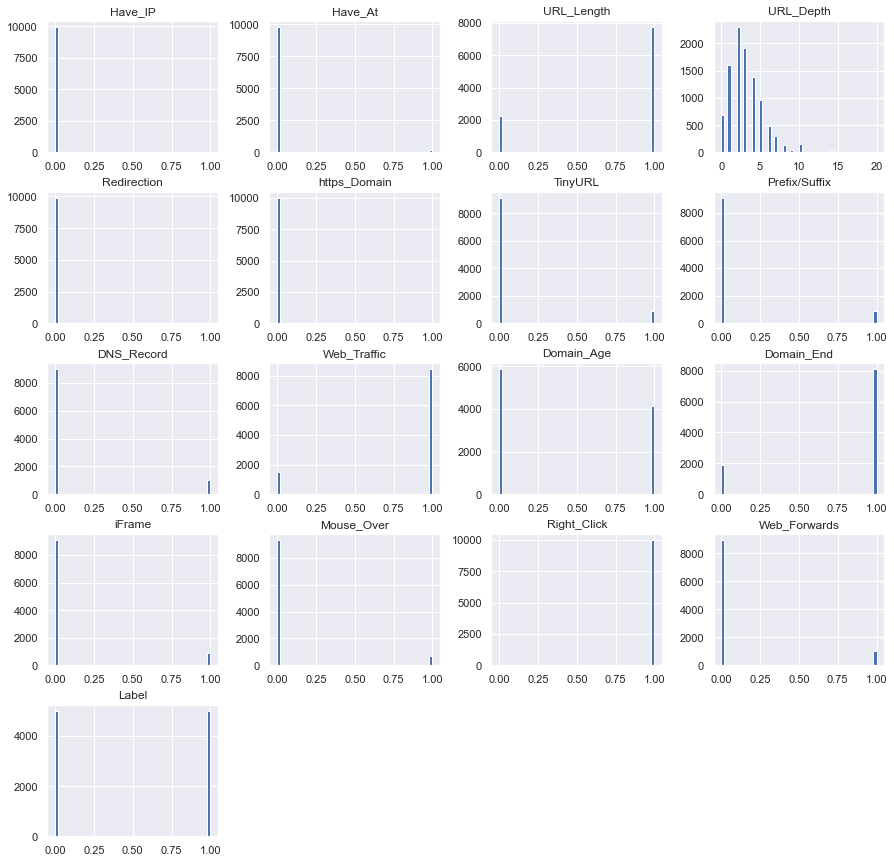

In [7]:
# Plotting the data distribution
df.hist(bins=50, figsize=(15,15))
plt.show()

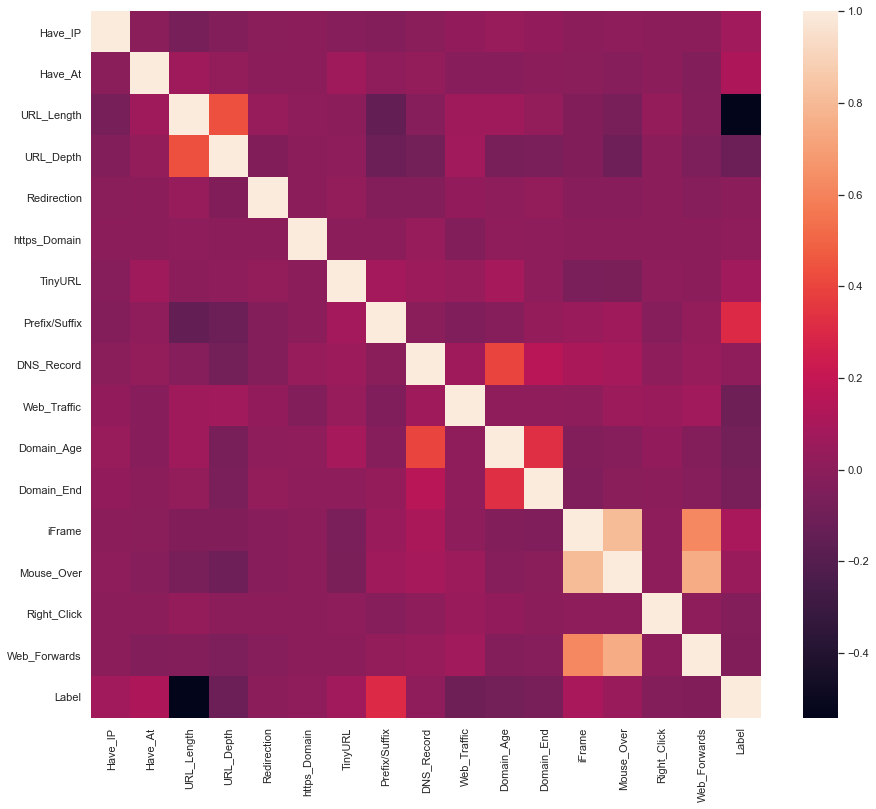

In [8]:
# Correlation Heatmap
plt.figure(figsize=(15,13))
sns.heatmap(df.corr())
plt.show()

# 5. Data Preprocessing and EDA
Here, we will explore our data and clean our data by applying various for preprocessing techniques in order to prepare the data to use it in the model. 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,10000.0,0.0055,0.073961,0.0,0.0,0.0,0.0,1.0
Have_At,10000.0,0.0226,0.148632,0.0,0.0,0.0,0.0,1.0
URL_Length,10000.0,0.7734,0.418653,0.0,1.0,1.0,1.0,1.0
URL_Depth,10000.0,3.0720,2.128631,0.0,2.0,3.0,4.0,20.0
Redirection,10000.0,0.0135,0.115408,0.0,0.0,0.0,0.0,1.0
https_Domain,10000.0,0.0002,0.014141,0.0,0.0,0.0,0.0,1.0
TinyURL,10000.0,0.0903,0.286625,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,10000.0,0.0932,0.290727,0.0,0.0,0.0,0.0,1.0
DNS_Record,10000.0,0.1008,0.301079,0.0,0.0,0.0,0.0,1.0
Web_Traffic,10000.0,0.8457,0.361254,0.0,1.0,1.0,1.0,1.0


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [10]:
# Dropping the Domain Column
df.drop(['Domain'], axis=1, inplace=True)

In [11]:
df.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

This leaves us with 16 features & a target column. The 'URL_Depth' maximum value is 20. According to my understanding, there is no necessity to change this column.

In [12]:
# Checking the data for null values
df.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 5000 rows of legitimate url data & bottom 5000 of phishing url data.

To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [13]:
# Shuffling the rows in the dataset so that when splitting the trainand test set are equally distributed
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,1
1,0,0,0,2,0,0,0,0,0,1,1,1,0,0,1,0,1
2,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,1


From the above execution, it is clear that the data doesnot have any missing values.

By this, the data is throughly preprocessed & is ready for training.

# 6. Splitting the data


In [14]:
# Seprating & assigning features and target columns to X & y

y = df['Label']
X  = df.drop(columns='Label', axis=1)

In [15]:
X.shape, y.shape

((10000, 16), (10000,))

In [16]:
# Splitting the dataset into train and test datasets: 80:20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)

In [17]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((8000, 16), (2000, 16), (8000,), (2000,))

# 7. Machine Learning Models & Training
From the dataset above, it is clear that this is a supervised machine learning task. There are two major types of supervised machine learning problems, called classification and regression.

This data set comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in this notebook are:

* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* Autoencoder Neural Network
* Support Vector Machines

In [18]:
# Importing packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_curve, roc_auc_score

In [19]:
# Creating holders to store the model perfromance results
Ml_model = []
acc_train = []
acc_test = []

# function to call for storing the results

def storeResults(model, a, b):
    Ml_model.append(model)
    acc_train.append(round(a,3))
    acc_test.append(round(b,3))

# 7.1 Decision Tree Classifier
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [20]:
# Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model
tree = DecisionTreeClassifier(max_depth=5)

# Fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
# Predicting the target value from the model for the samples
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

### Performance Evaluation

In [22]:
# computing the accuracy of the model performance
acc_test_tree = accuracy_score(y_test, y_test_tree)
acc_train_tree = accuracy_score(y_train, y_train_tree)

print("Decision Tree: Accuracy on training Data : {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on Test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data : 0.814
Decision Tree: Accuracy on Test Data: 0.812


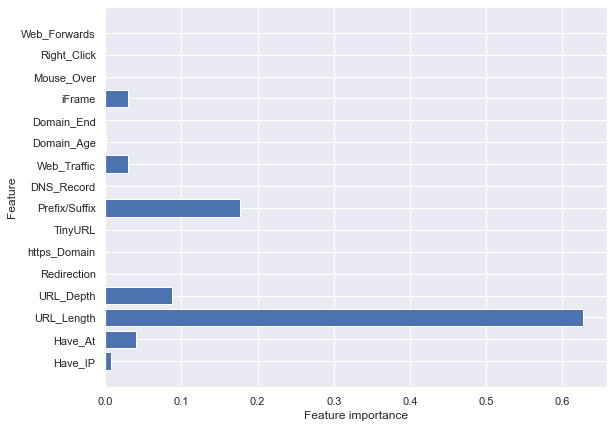

In [23]:
# Checking the feature importance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Storing the results:

In [24]:
# The below mentioned order of parameter passing is important.
# Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# 7.2. Random Forest Classifier
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=5)

forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [27]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.820
Random forest: Accuracy on test Data: 0.819


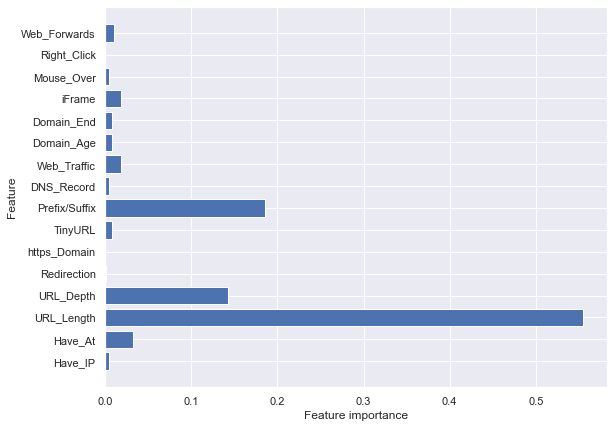

In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [29]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# 7.3. Multilayer Perceptrons (MLPs): Deep Learning
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.



In [30]:
# multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=([100,100,100]),alpha=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [31]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [32]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.864
Multilayer Perceptrons: Accuracy on test Data: 0.859


In [33]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [34]:
# XGBoost classification model

from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=7, learning_rate=0.4)

In [36]:
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [37]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation**

In [41]:
# Computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train, y_train_xgb)
acc_test_xgb = accuracy_score(y_test, y_test_xgb)

print("XGBoost :  Accuracy on Training Data : {:.3f}".format(acc_train_xgb))
print("XGBoost :  Accuracy on Test Data : {:.3f}".format(acc_test_xgb))

XGBoost :  Accuracy on Training Data : 0.866
XGBoost :  Accuracy on Test Data : 0.862


In [42]:
storeResults("XGBoost", acc_train_xgb, acc_test_xgb )

# 7.5 Autoencoder Neural Network

An auto encoder is a neural network that has the same number of input neurons as it does outputs. The hidden layers of the neural network will have fewer neurons than the input/output neurons. Because there are fewer neurons, the auto-encoder must learn to encode the input to the fewer hidden neurons. The predictors (x) and output (y) are exactly the same in an auto encoder.

In [64]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [65]:
#building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dense_9 (Dense)             (None, 14)                238       
                                                                 
 dense_12 (Dense)            (None, 16)                240       
                                                                 
 dense_13 (Dense)            (None, 16)                272       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable p

In [66]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 [==============================] - 1s 3ms/step - loss: 1.2200 - accuracy: 0.3311 - val_loss: -0.4906 - val_accuracy: 0.8475
Epoch 2/10
100/100 [==============================] - 0s 2ms/step - loss: -0.7631 - accuracy: 0.8383 - val_loss: -0.8674 - val_accuracy: 0.6331
Epoch 3/10
100/100 [==============================] - 0s 2ms/step - loss: -0.8804 - accuracy: 0.2630 - val_loss: -0.9071 - val_accuracy: 0.1088
Epoch 4/10
100/100 [==============================] - 0s 2ms/step - loss: -0.9231 - accuracy: 0.0995 - val_loss: -0.9468 - val_accuracy: 0.0419
Epoch 5/10
100/100 [==============================] - 0s 2ms/step - loss: -0.9393 - accuracy: 0.0452 - val_loss: -0.9637 - val_accuracy: 0.0319
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: -0.9577 - accuracy: 0.0344 - val_loss: -0.9834 - val_accuracy: 0.0194
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: -0.9765 - accuracy: 0.0105 - val_loss: -0.9965 - val_accuracy: 

**Performance Evaluation** 

In [67]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

63/63 [==============================] - 0s 1ms/step - loss: -1.0730 - accuracy: 0.0035

Autoencoder: Accuracy on training Data: 0.004
Autoencoder: Accuracy on test Data: 0.004


In [68]:
storeResults("AutoEncoder", acc_train_auto, acc_test_auto)

# 7.6. Support Vector Machines
In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [71]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [72]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [73]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.802
SVM : Accuracy on test Data: 0.800


In [74]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

# 8. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [75]:
# Creating the Dataframe
results = pd.DataFrame({
    "ML Model" : Ml_model,
    "Train_Accuracy" : acc_train,
    "Test Accuracy" : acc_test})

In [76]:
results

,ML Model,Train_Accuracy,Test Accuracy
0,Decision Tree,0.814,0.812
1,Random Forest,0.820,0.818
2,Multilayer Perceptrons,0.864,0.859
3,XGBoost,0.866,0.862
4,AutoEncoder,0.004,0.004
5,SVM,0.802,0.800


In [78]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train_Accuracy'], ascending=False)

,ML Model,Train_Accuracy,Test Accuracy
3,XGBoost,0.866,0.862
2,Multilayer Perceptrons,0.864,0.859
1,Random Forest,0.820,0.818
0,Decision Tree,0.814,0.812
5,SVM,0.802,0.800
4,AutoEncoder,0.004,0.004


For the above comparision, it is clear that the XGBoost Classifier works well with this dataset.

So, saving the model for future use.

In [79]:
# save XGBoost model to file

import pickle

with open("Bestphishing_model16.pickel", "wb") as f:
    pickle.dump(xgb, f)

In [ ]:
# Load model from file

with open('Bestphishing_model16.pickel'), 'rb') 